In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
laptop_data = pd.read_csv("laptop_data.csv")
print(laptop_data)

      Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...            

In [4]:
label_encoder = LabelEncoder()
laptop_data = laptop_data.drop('Unnamed: 0', axis=1)
laptop_data['Company'] = label_encoder.fit_transform(laptop_data['Company'])
laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])
laptop_data['ScreenResolution'] = label_encoder.fit_transform(laptop_data['ScreenResolution'])
laptop_data['Cpu'] = label_encoder.fit_transform(laptop_data['Cpu'])
laptop_data['Gpu'] = label_encoder.fit_transform(laptop_data['Gpu'])
laptop_data['Memory'] = label_encoder.fit_transform(laptop_data['Memory'])
laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '').astype('int32')
laptop_data['OpSys'] = label_encoder.fit_transform(laptop_data['OpSys'])
print(laptop_data)

      Company  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  Gpu  \
0           1         4    13.3                23   65    8       4   58   
1           1         4    13.3                 1   63    8       2   51   
2           7         3    15.6                 8   74    8      16   53   
3           1         4    15.4                25   85   16      29    9   
4           1         4    13.3                23   67    8      16   59   
...       ...       ...     ...               ...  ...  ...     ...  ...   
1298       10         0    14.0                13   89    4       4   47   
1299       10         0    13.3                19   89   16      29   47   
1300       10         3    14.0                 0   34    2      35   40   
1301        7         3    15.6                 0   89    6      10   21   
1302        2         3    15.6                 0   34    4      26   40   

      OpSys  Weight        Price  
0         8    1.37   71378.6832  
1         8    1.

Визуализируйте матрицу корреляций в виде тепловой карты.

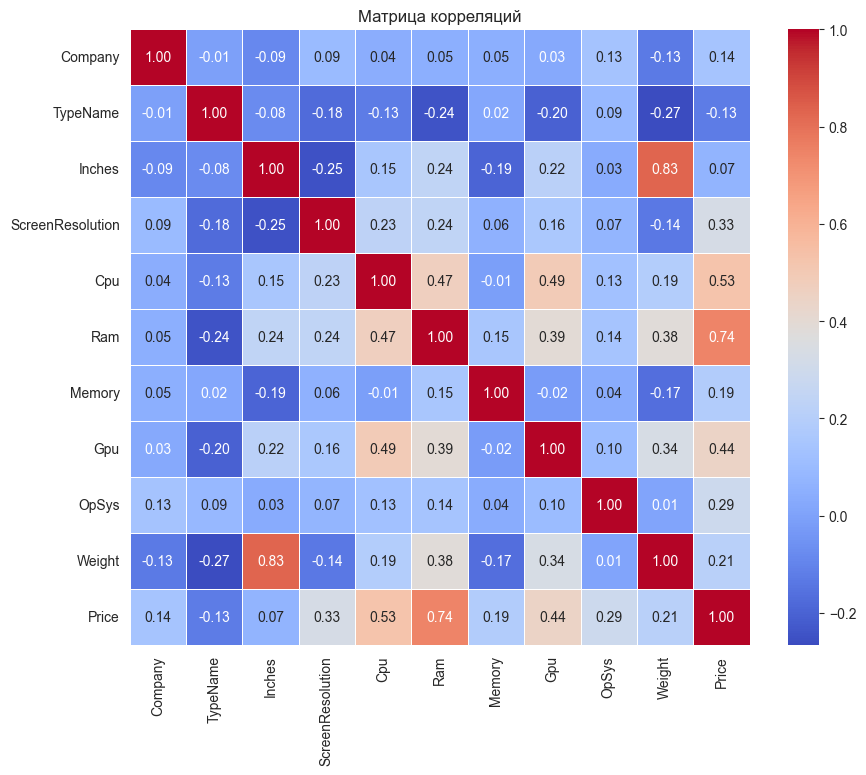

In [5]:
correlation_matrix = laptop_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляций')
plt.show()

Постройте матрицу диаграмм рассеяния.

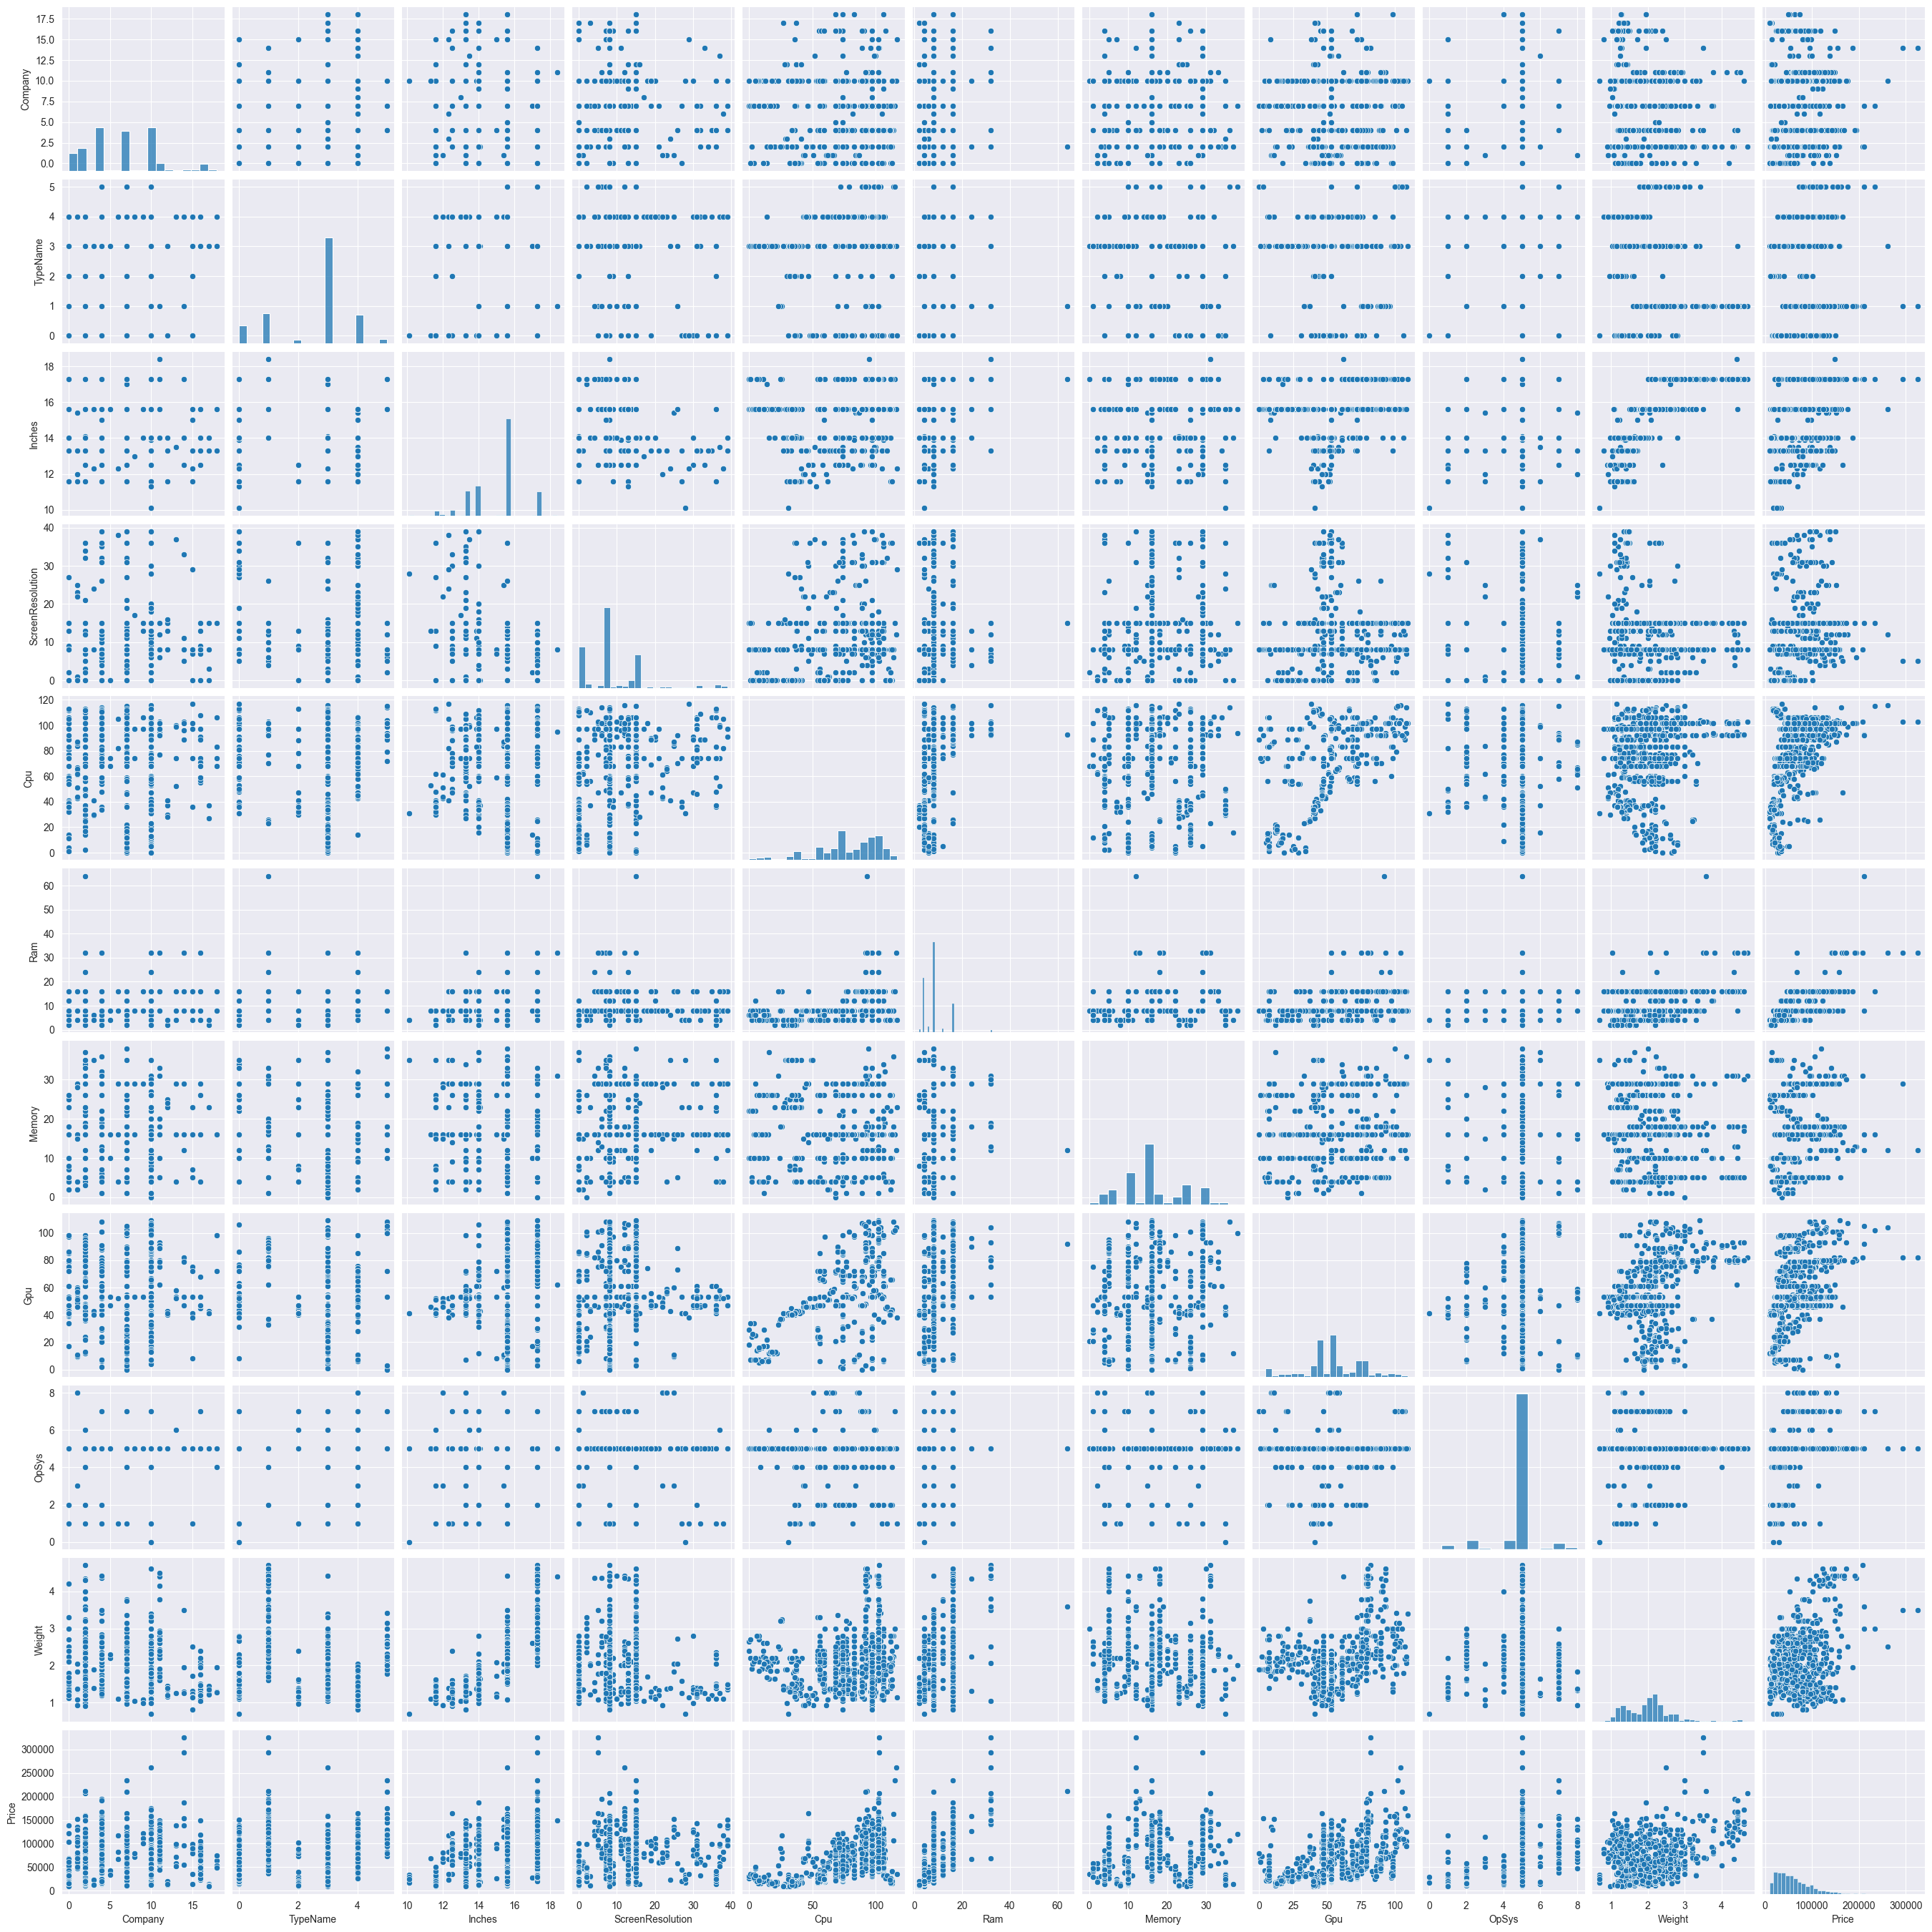

In [6]:
sns.pairplot(laptop_data)
plt.show()

Проанализируйте коэффициенты корреляции, диаграммы рассеяния и
выберите параметры для построения модели простой линейной регрессии.

Выбранные параметры:
- Cpu
- Gpu
- Ram

Рассчитайте модель и визуализируйте график модели на диаграмме
рассеяния параметра (который учтен в модели)

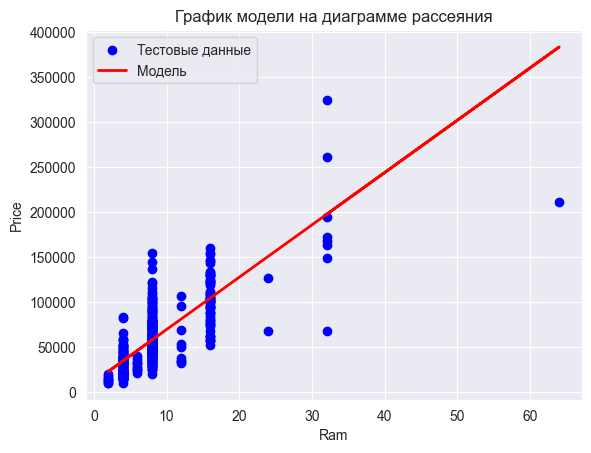

In [7]:
X = laptop_data[['Ram']].values
y = laptop_data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test[:,0], y_test, color='blue', label='Тестовые данные')
plt.plot(X_test[:,0], y_pred, color='red', linewidth=2, label='Модель')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('График модели на диаграмме рассеяния')
plt.legend()
plt.show()

Оцените качество полученной модели.

In [8]:
# Оценка коэффициента детерминации
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

# Оценка среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

Коэффициент детерминации (R^2): 0.545297004974613
Среднеквадратичная ошибка (MSE): 691193108.0946577
Train R^2 score: 0.5508409469079132
Test R^2 score: 0.545297004974613


Добавьте в модель линейной регрессии еще несколько параметров, в той или иной мере влияющих на целевую переменную. Рассчитайте модель с несколькими параметрами и оцените качество модели

In [9]:
X = laptop_data.drop(['Price', 'Company', 'TypeName', 'Inches', 'Memory', 'Weight'], axis=1)
y = laptop_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Оценка среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)

print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

Среднеквадратичная ошибка (MSE): 562984509.1692924
Train R^2 score: 0.6532255263386813
Test R^2 score: 0.6296393302042049
